In [21]:
rbinom(1, 100, 0.75)


[1] 70

In [14]:
library(tidyverse)

── Attaching packages ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.8     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.1
✔ readr   2.1.2     ✔ forcats 0.5.2
── Conflicts ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


### Empirical Distribution of a Statistic

* The Law of Averages implies that with high probability, the empirical distribution of a large random sample will resemble the distribution of the population from which the sample was drawn.

* The empirical histogram of a large random sample is likely to resemble the histogram of the population.

* Given a large fish tank that contains 580 Mozambique tilapia fish
 * Suppose that we know, somehow, the weight of all the fishes in the tank
  * Population is the total of all fishes in the tank
  * Random variable $X \sim \mathcal{N}(630.26, 75.89)$.


In [1]:
weights = read.csv("data/tank_5_oreochromis_mossambicus.csv")
head(weights)

,fish_index,data
,<int>,<dbl>
1,1,574.2974
2,2,728.5173
3,3,517.1673
4,4,561.2709
5,5,565.4517
6,6,696.6255


In [2]:
dim(weights)

[1] 580   2

In [5]:
weights_tbl = read_csv("data/tank_5_oreochromis_mossambicus.csv")
head(weights_tbl)

Rows: 580 Columns: 2
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
dbl (2): fish_index, data

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


fish_index,data
<dbl>,<dbl>
1,574.2974
2,728.5173
3,517.1673
4,561.2709
5,565.4517
6,696.6255


In [7]:
weights_tbl <- read_csv("data/tank_5_oreochromis_mossambicus.csv",
                      col_types = cols(
                        fish_index = col_integer(),
                        data = col_double()
                      ))
head(weights_tbl)

fish_index,data
<int>,<dbl>
1,574.2974
2,728.5173
3,517.1673
4,561.2709
5,565.4517
6,696.6255


In [8]:
names(weights_tbl) = c("index", "weights")
head(weights_tbl)

index,weights
<int>,<dbl>
1,574.2974
2,728.5173
3,517.1673
4,561.2709
5,565.4517
6,696.6255


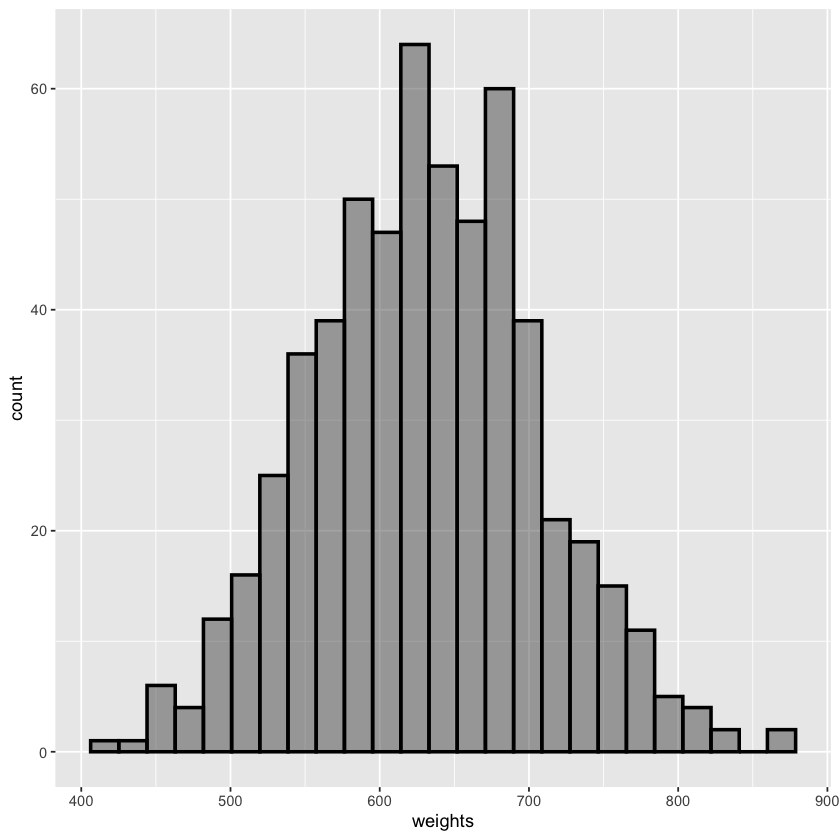

In [14]:
ggplot(data=weights_tbl) + 
  geom_histogram(aes(x=weights), bins = 25, alpha=0.5, color="black", size=1)


### Working with Kernel Density Estimates


* Kernel density estimation (KDE) is a non-parametric way to estimate the probability density function of a random variable
  * A fundamental data smoothing problem where inferences about the population are made, based on a finite data sample.

* We much prefer to visualize data using KDEs instead of histograms for several reasons, which we will discuss later 
  * `geom_density` estiames the density using the KDE approach.
  * Param `bw` of `geom_density` is tricky to estimate, but for now, we will just use the value that provides the smoothest KDE with the lowest variance.


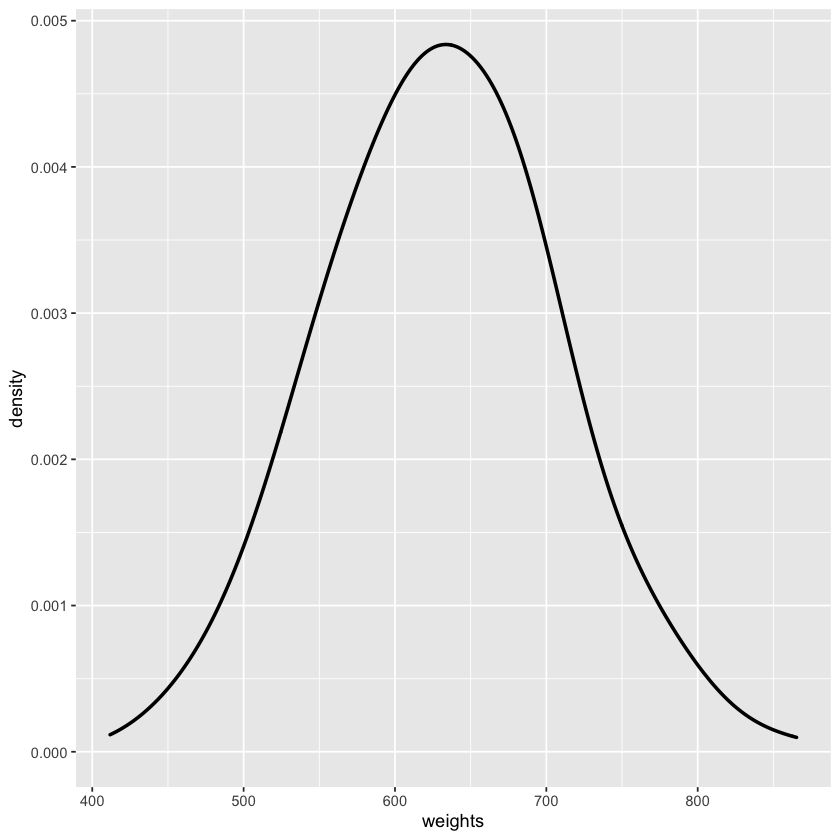

In [8]:
ggplot(data=weights_tbl) + 
  geom_density(aes(x=weights), color="black", size=1, bw=30)



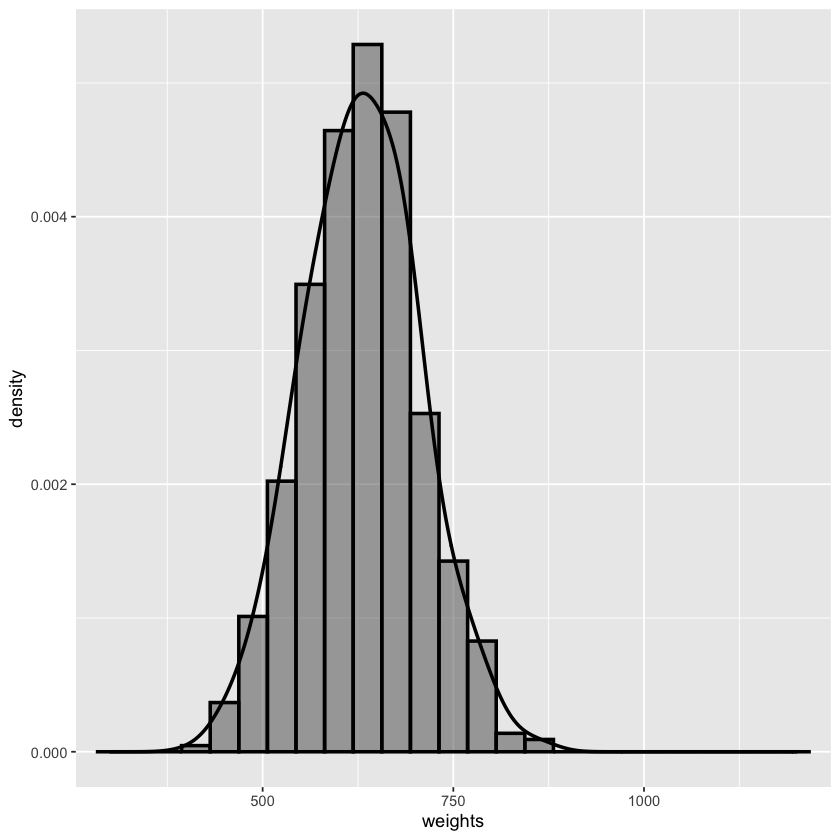

In [10]:
ggplot(data=weights_tbl) + 
  geom_histogram(aes(x=weights, y=..density..), bins = 25, alpha=0.5, color="black", size=1) +
  geom_density(aes(x=weights), color="black", size=1, bw=25) +  
  scale_x_continuous(limits=c(300,1200), oob = scales::oob_keep)
  
# The oob = scales::oob_keep was added to fix an obscure warning
# the solution was proposed here
# https://github.com/tidyverse/ggplot2/issues/4083

### Parameters of a Distribution

* Recall that a distribution's parameters define what the distribution looks like
  * They are the numerical quantities that define a population

* Knowing the parameters can help:
  * Calculate the probability of certain events
  * Compute expectation
  * Understand the variance in the observations

* For the fish data, we can easily compute the population parameters.
 * We distinguish sample mean $\bar{X}$ from population mean $\mu$
   * We typically compute $\bar{X}$ based on a small sample of the data as a proxy for $\mu$
 * Here, we have access to the whole population, so we can calculate the population mean

In [11]:
mean(weights_tbl$weights)
sd(weights_tbl$weights)

[1] 630.2647

[1] 75.8954

### Statistics 

- Statistics (field) deals to a large part with the estimation of unknown parameters. 

- A **statistic** (singular!) is any number computed using the data in a sample. 

* parameters estimated from subsets of the data are, therefore, statistics

  * Statistics are subject to sample bias.

* We know that for well behaved distributions samples are likely to resemble the populations they are drawn from
  * This is the whole promise in stats

* What would the sample mean look like if we randomly sampled from the population of all fish?


In [19]:
set.seed(32) # Ask me what this means?
random_sample = sample(weights_tbl$weights, 50)
mean(random_sample)

[1] 610.2921

In [20]:
random_sample = sample(weights_tbl$weights, 50)
mean(random_sample)

[1] 631.6999

### Statistics - Cont'd

* Each sample (50 fish) produces one observed value of the statistic. 
  * These values are "somewhat" similar to the real population mean (630.26)

* It is highly unlikely that different samples will yield the same statistic.
* Based on the selected samples, how does the statistic change? It is possible to answer this question by computing the statistic many times and noting the results
  * A histogram of those values will show us how the statistic is distributed.


In [21]:
n = 2

n %>%
  replicate(sample(weights_tbl$weights, 50))

548.7803,586.7556
594.5981,607.1552
579.1077,680.5137
561.2709,565.5827
624.1020,591.2804
647.3248,676.6681
689.8878,716.2808
587.7465,584.8933
643.6683,665.8153
628.8683,656.9784
602.7418,665.4765


In [17]:
n = 2

n %>%
  replicate(sample(weights_tbl$weights, 50)) %>%
  t() %>%
  apply(1, mean)


[1] 631.9064 651.6659

In [22]:
set.seed(42)
n = 1000

samples_means <- n %>%
  replicate(sample(weights_tbl$weights, 50)) %>%
  t() %>%
  apply(  1, mean)

In [23]:
samples_means

[1] 632.1231 641.4569 638.2472 624.5344 609.0174 622.9414 639.6539 638.0248
   [9] 613.9915 637.4001 639.6151 638.6640 622.9224 637.8899 639.1213 644.1553
  [17] 620.8740 637.0603 638.8021 623.3164 632.3270 651.9820 645.4363 634.2324
  [25] 621.5730 622.9660 648.6192 624.4172 607.6209 632.6735 611.0936 628.2859
  [33] 633.5969 630.2986 650.4510 635.3246 610.8443 624.6716 627.7493 623.7004
  [41] 618.8937 646.5949 624.3730 632.7360 616.8057 624.9025 599.7457 622.7633
  [49] 634.9279 625.1380 631.2583 627.1398 628.2245 628.7335 630.0421 645.1364
  [57] 642.0871 629.2772 638.6166 639.5715 621.6769 626.8507 644.1702 627.9949
  [65] 607.1146 621.0732 644.3044 618.6977 615.1155 629.7564 625.6864 626.0368
  [73] 633.9407 636.8573 633.0282 630.3128 617.7754 618.5690 617.9917 612.1937
  [81] 634.4409 635.7629 604.4536 612.1043 642.3413 636.0190 636.8698 624.7812
  [89] 650.4699 629.7853 615.5511 616.7966 630.5413 629.9670 659.6832 635.0133
  [97] 631.7985 626.9673 639.8819 644.0349 619.1338 619.8031 635.5469 650.1504
 [105] 649.2465 631.1991 636.7844 647.0696 631.9271 614.3733 634.8014 614.3948
 [113] 603.8061 638.1147 625.0160 644.8265 637.1201 635.8464 626.6725 626.1489
 [121] 614.5093 635.9961 640.2307 632.2046 624.1711 621.3770 618.5690 637.5026
 [129] 631.9775 622.4749 624.6643 622.7462 629.1084 611.0075 636.9213 634.0973
 [137] 613.8904 629.1928 626.4577 633.3789 617.0029 622.4850 627.4598 635.1063
 [145] 620.4899 636.3052 629.1038 628.6438 650.1291 623.2476 627.6827 609.6181
 [153] 623.7176 646.1787 642.8181 634.5141 630.4168 603.6123 623.3810 640.6983
 [161] 627.9036 644.5339 639.0553 649.3071 622.1859 622.3135 600.6997 639.2012
 [169] 635.2183 627.8835 623.4303 637.3798 640.1816 641.4744 636.6309 628.6210
 [177] 632.9680 615.4155 619.6437 630.1182 630.8882 620.6785 643.6540 638.9347
 [185] 628.8261 640.1692 619.3264 628.5117 636.0305 637.0407 628.3548 633.2399
 [193] 616.5570 618.6582 626.9588 614.4681 652.3112 613.9104 642.3513 654.6065
 [201] 626.7797 625.1439 629.5715 640.5018 637.5430 630.5933 632.9695 619.8840
 [209] 644.5665 617.3083 641.5678 625.3742 636.8822 627.9145 637.9218 641.9487
 [217] 631.7922 630.1590 630.0053 647.1544 646.7660 637.3708 643.1223 623.6980
 [225] 641.9742 617.3579 618.4097 630.9071 641.9101 628.1784 622.0917 640.1690
 [233] 637.4693 638.1328 639.0432 627.0897 624.7771 641.7357 627.9504 625.2188
 [241] 625.4214 609.9784 642.6680 623.8996 638.6784 651.2820 646.7690 636.5668
 [249] 615.4602 635.5517 639.7413 627.6941 636.9165 641.1138 650.9539 631.5017
 [257] 616.8425 638.0949 640.6007 619.2632 633.0366 620.9946 632.3217 635.8719
 [265] 623.3935 625.0863 635.2519 645.7334 603.4289 630.8267 638.2886 620.7994
 [273] 636.9446 621.8431 637.1639 641.5073 603.9870 618.7120 627.8369 642.2216
 [281] 622.7113 627.3764 645.7032 632.9558 643.3248 641.2410 639.4334 650.7309
 [289] 632.4713 635.4170 627.6945 632.2608 637.1749 629.3577 617.8553 628.4118
 [297] 632.3319 634.2550 625.3001 636.7707 631.5949 622.8936 624.0280 633.5534
 [305] 633.5239 622.6166 645.1028 650.7248 628.4788 629.3004 640.8323 619.9604
 [313] 631.5847 636.9878 624.5316 619.0760 627.4748 614.5432 630.2425 619.6767
 [321] 624.7582 617.2029 622.2850 626.0332 625.2787 625.7700 632.1277 634.5512
 [329] 637.4313 624.4236 631.8179 643.5601 612.0068 631.1840 616.1357 632.1983
 [337] 609.0802 637.5381 628.4027 625.3487 645.5315 626.6389 638.4471 644.5024
 [345] 622.4983 621.3234 627.8814 651.2265 628.9387 650.8510 627.3532 628.6014
 [353] 619.4989 629.3959 614.6791 641.2444 620.5022 653.0052 636.4136 621.6962
 [361] 631.7099 606.5195 615.0061 631.1825 626.4847 631.2142 646.8303 664.9476
 [369] 645.3269 625.5628 629.7164 635.0936 618.0711 621.8232 632.7575 631.3247
 [377] 624.5905 641.2577 623.8126 617.8796 639.8069 647.9215 656.1449 625.5276
 [385] 620.3697 639.2402 636.9781 641.9412 632.1044 643.8495 631.8175 626.5423
 [393] 617.3859 634.9206 653.4082 656.8632 636.1119 638.8474 642.8333 634.3986
 [401] 627.2209 640.8060 623.8638 626.7158 619.2849 6

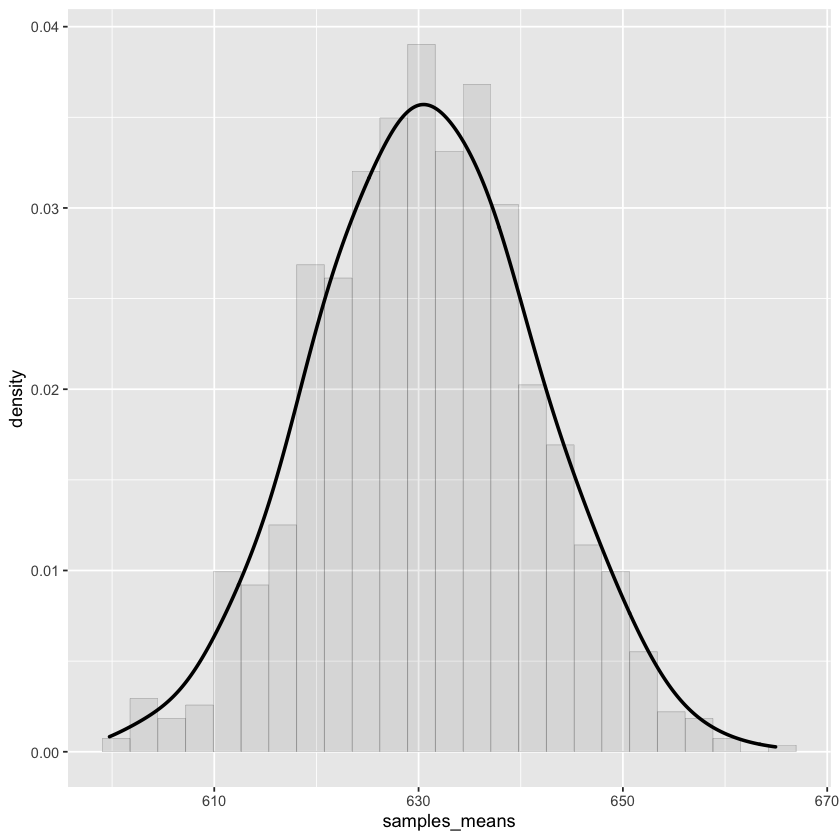

In [281]:
ggplot() + 
  geom_histogram(aes(x=samples_means, y=..density..), bins = 25, alpha=0.1, color="black", size=0.05) +
  geom_density(aes(x=samples_means), color="black", size=1, bw=3.5)


In [154]:
mean(samples_means)

[1] 630.6604

### Calculating Statistics

Example: 

* You use a DNA Methylation kit that is advertised to have a probability of success of 0.26 on invertebrates.

* You repeat the experiment 100 times (100 samples) and you only succeed 10 times (0.10)

* You argue with the vendor that the kit is faulty and needs to be replaced.


### A Model 

- A model stipulates that the probability of success is 0.26

- The manufacturer explain that they only provide probabilistic guarantees

   - I.e., if you were to repeat this a large number of times, you would arrive at the value 0.26
      - Repeat this process by trying 100 kits multiple times (say 500 times 100 kits)

- We are in a good position to assess this model

- What type of probability distribution is appropriate for this example?

  - Discrete or continuous?

- How can we simulate the experiment?
    
    - What are we trying to estimate? 

In [25]:
x <- c(TRUE, TRUE, FALSE)
sum(x)

[1] 2

In [37]:
rbinom(1, 100, 0.26)

[1] 24

In [38]:
rbinom(1, 100, 0.26)

[1] 21

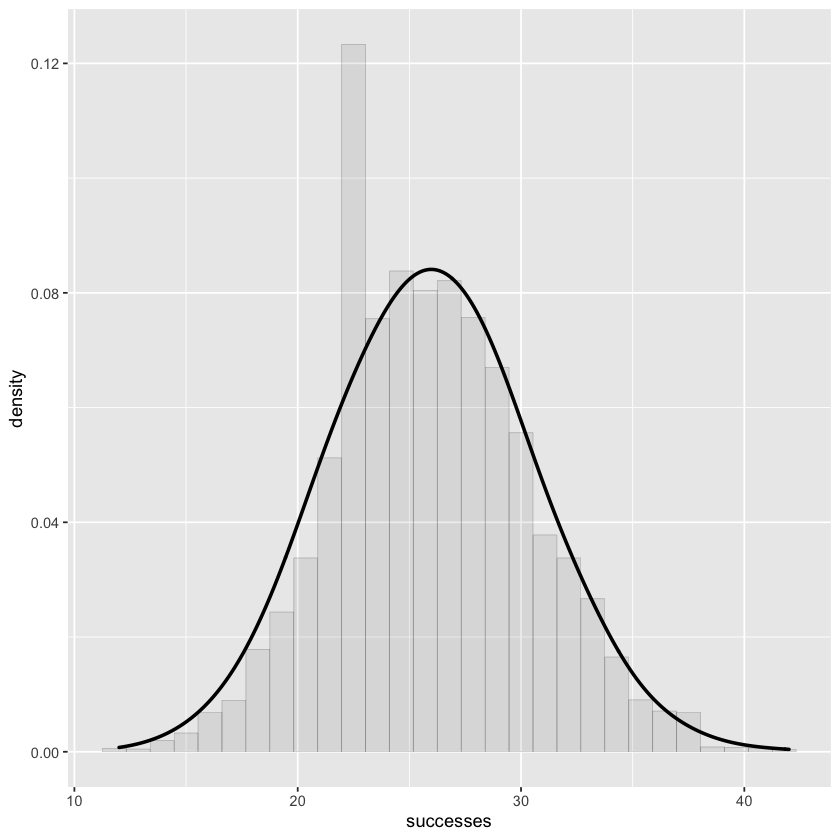

In [39]:
set.seed(42)
successes = rbinom(10000, 100, 0.26)

ggplot() + 
  geom_histogram(aes(x=successes, y=..density..), bins = 29, alpha=0.1, color="black", size=0.05) +
  geom_density(aes(x=successes), color="black", size=1, bw=1.6)



### The Statistic

* The manufacturer says p=0.26 represents the population.

* A natural statistic, number of successes in our simulated sample of 100 tests.

  * Small value with favor alternative viewpoint.


* If the model were true, what is the distribution of success? 



In [40]:
rbinom(10, 100, 0.26)

[1] 26 28 30 24 27 28 25 29 24 19

In [41]:

n = 2

n %>%
  replicate(rbinom(10, 100, 0.26)) %>%
  t()


25,31,30,22,27,30,24,23,25,22
16,34,27,29,30,32,21,25,26,22


In [42]:
# To get a sense of the variability, let's generate 10,000 simulated values of the count. 
nb_replicates = 10000
nb_kits = 100

nb_success = rbinom(nb_replicates, nb_kits, 0.26)

In [43]:
head(nb_success)

[1] 24 22 23 29 26 28

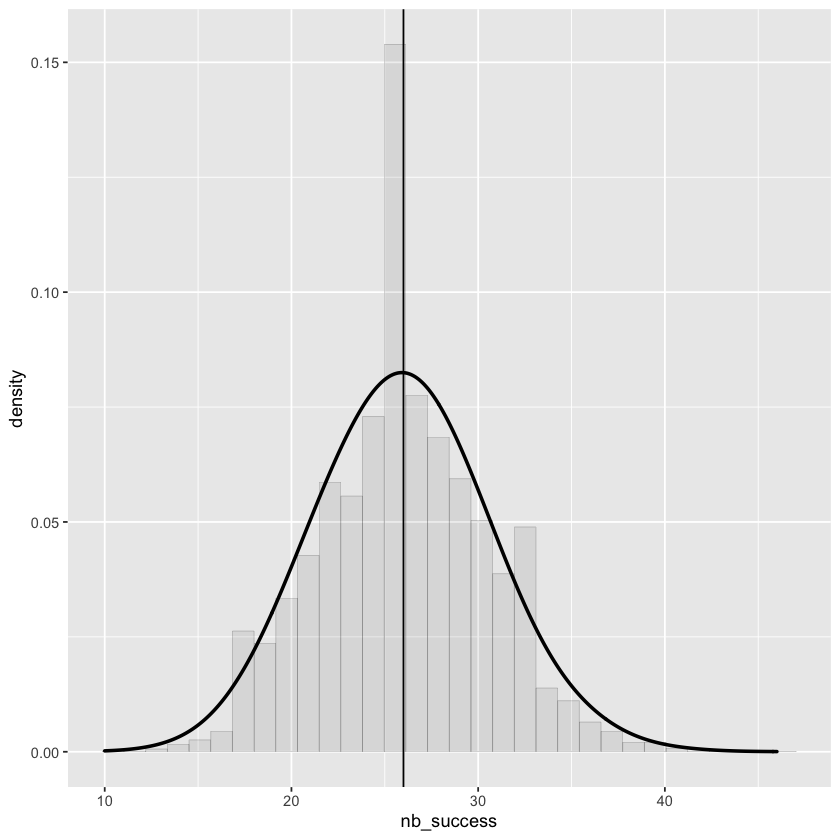

In [44]:
ggplot() + 
  geom_histogram(aes(x=nb_success, y=..density..), bins = 32, alpha=0.1, color="black", size=0.05) +
  geom_density(aes(x=nb_success), color="black", size=1, bw=2) + 
  geom_vline(aes(xintercept=26))

In [45]:
sum(nb_success <= 10)

[1] 2

### Comparing the Prediction and the Observed Data

- The value 10 is far out. 
  - No samples yield less 10 that 10 successes

- Assuming the claim is true, if we use the kit 100 times, the probability of observing 10 successes is ~0 

- This is evidence that the model (claim) is not consistent with the data we obtained

  - When the data and a model are inconsistent, the model is hard to justify. 

- While it is *possible* to have 10 successes, simulation shows that it's extremely unlikely. 
  * The empirical probability of such an event is actually null


### General Approach

* This method of assessing models is very general. 
1. We have a value we wish to compare to some distribution
2. We generate samples under the hypothesis we would like to test
  * This is called the null hypothesis

3. we reason about the observed data or statistic


* Here is an example in which we use it to assess a model in a completely different setting

### Mendel's Pea Flowers ###

* In a particular variety, each pea plant has either purple or white flowers.

* Plant colors are independent

* Mendel hypothesized that the plants should bear purple or white flowers at random, in the ratio 3:1. 

* The null model: For every plant, there is a 75% chance that it will have purple flowers, and a 25% chance that the flowers will be white, regardless of the colors in the remaining plants.

* We sampled 100 flowers and 72 were actually purple

* Do our results agree with Mendel's model?


### Approach to Assessment

1. Assess the model by simulating plants under the assumptions of the model 

2. Compare the results to the data that Mendel recorded
    * If the model is good, the percent of purple-flowering plants in the sample should be close to 75%. 
 
    * If the model is not good, the percent purple-flowering will be away from 75%. 

        * It may be higher, or lower; the direction doesn't matter.

3. The *distance* between 75% and the percent of purple-flowering plants in the sample is critical. 

 * Big distances are evidence that the model isn't good. Therefore, a good statistic is the distance between the sample percent and 75%

$$
\big{\vert} \text{sample percent of purple-flowering plants} - 75 \big{\vert}
$$


### Predicting the Statistic Under the Model ###

* How big the distance would be if Mendel's model were true?

  * Use `sample_proportions` to simulate the distance under the assumptions of the model.

* Mendel had 929 plants of the variety corresponding to this model.

* One simulated value of the experiment would look like


In [245]:
rbinom(1, 929, 0.75)/929

[1] 0.7416577

In [26]:
rbinom(1, 929, 0.75)/929

[1] 0.7621098

In [27]:
rbinom(1, 929, 0.75)/929

[1] 0.7642626

In [31]:
# We could simulate from a batch of size 929, as Mendel did
abs((100 * rbinom(1,929, 0.75)/929) - 75)

[1] 2.44887

### Running the Simulation
* To get a sense of how variable the distance could be, we have to simulate it many more times.
  * We will generate 10,000 values of the distance.
* We will plot the histogram of the simulated values to see the distribution of the distance as predicted by the model.


In [258]:

(100 * rbinom(10, 929, 0.75)/929) - 75


[1] -0.6189451  0.4574812 -1.3724435  1.4262648 -1.3724435  0.7804090
 [7]  0.9956943  1.2109795  1.6415501  0.4574812

In [267]:
distances = abs((100 * rbinom(10000, 929, 0.75)/929) - 75)
distances[0:10]

[1] 1.26480086 0.61894510 2.01829925 0.40365985 1.21097955 0.18837460
 [7] 0.08073197 1.64155005 0.24219591 0.29601722

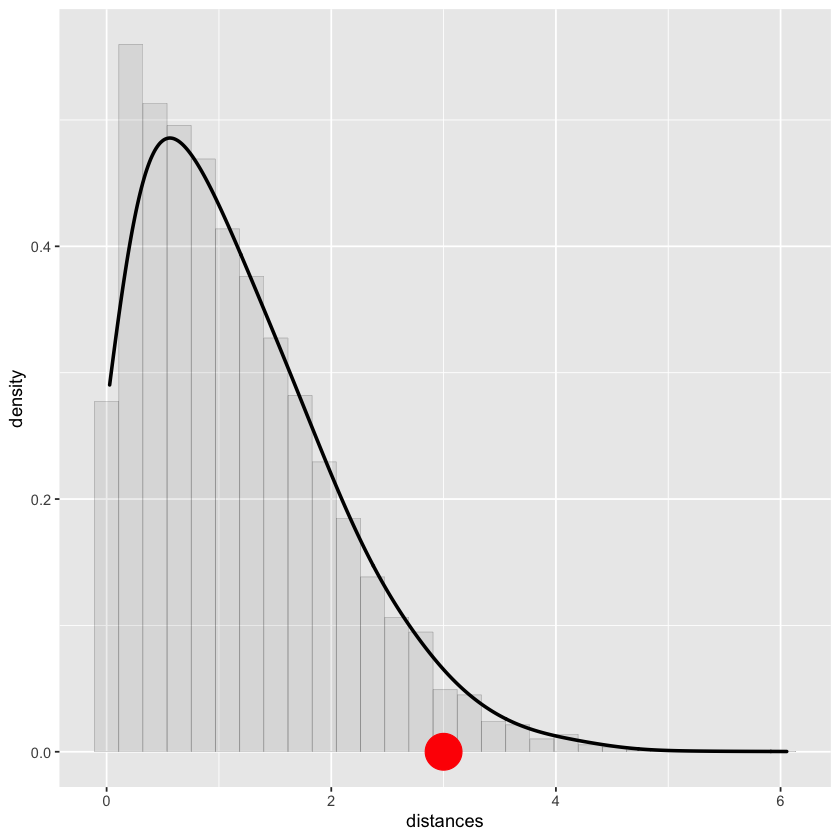

In [288]:
set.seed(42)
successes = rbinom(10000, 100, 0.26)

ggplot() + 
  geom_histogram(aes(x=distances, y=..density..), bins = 29, alpha=0.1, color="black", size=0.05) +
  geom_density(aes(x=distances), color="black", size=1, bw=0.3) + 
  geom_point(aes(x=3, y=0), size=10, color="red")


In [292]:
sum(distances >=3)/10000

[1] 0.0331